<a href="https://colab.research.google.com/github/pramit46/LLMTry/blob/main/WT/WT_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets evaluate accelerate torch

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


model.config

In [ ]:
model.config.output_attentions


True

In [ ]:
#prompt=["there is resturant in my locality , I visited it yesterday.it was not very good", "I dont think this resturant is worth money ."]

In [ ]:
import numpy as np
import torch.nn.functional as F
from transformers import  AutoTokenizer , AutoModelForSequenceClassification

def generate_sentiment(prompt:list):
    list =[]
    model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
    token = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name,output_attentions = True)
    for i in prompt:
        token_prompt= token(i,padding=True,truncation=True,return_tensors='pt')
        logit = model(token_prompt["input_ids"])
        prob = F.softmax(logit.logits,dim=1)
        array=prob.detach().numpy().squeeze(0)
        print(f"raw array is {array}")

        ####seems model has affinity towards very positive . Hence using weights .
        weights = np.array([1.5,1,1,0.9,0.7])
        weighted_array= array*weights

        print(f"weighted array is {weighted_array}")
        array = weighted_array/weighted_array.sum()
        print(f"array is {array}")
        list.append(array)
    print(f"final list is {list}")
    sum_f=np.sum(list,axis=0)
    print(f"total list is {sum_f}")
    print(len(prompt))
    final_list = np.divide(sum_f,len(prompt))

    print(final_list)
    return final_list








C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import re
import pandas as pd
import numpy as np
path = r"C:\Users\Admin\outputpet1235.csv"


data_frame = pd.read_csv(path)
review_df = data_frame["reviews_text"]

review_list=[]

for df in review_df :
    cleaned_str = df.replace('[', '').replace(']', '').replace('\\', '').replace(':)', '')

    split_pattern = r'[\'"],\s*|[\'"]\.\s*'
    sentences = re.split(split_pattern, cleaned_str)
    review_list.append(sentences)


sentiment_review =[]
for  rev in review_list:
    sentiment = generate_sentiment(rev)
    print(sentiment)
    sentiment_review.append(sentiment)











BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


raw array is [0.00263171 0.00607786 0.02881658 0.38257205 0.57990175]
weighted array is [0.00394756 0.00607786 0.02881658 0.34431485 0.40593123]
array is [0.00500269 0.00770239 0.03651884 0.43634526 0.51443082]
raw array is [0.0012134  0.00182653 0.01767741 0.33296716 0.64631546]
weighted array is [0.0018201  0.00182653 0.01767741 0.29967045 0.45242082]
array is [0.00235333 0.00236164 0.02285629 0.38746382 0.58496492]
raw array is [0.00117682 0.00137767 0.00898305 0.25132856 0.737134  ]
weighted array is [0.00176523 0.00137767 0.00898305 0.2261957  0.51599379]
array is [0.00234017 0.00182638 0.01190888 0.29986885 0.68405572]
raw array is [0.00337461 0.00435122 0.01258913 0.17414175 0.8055433 ]
weighted array is [0.00506192 0.00435122 0.01258913 0.15672757 0.56388031]
array is [0.00681638 0.00585935 0.01695254 0.2110496  0.75932212]
raw array is [0.01559503 0.07802626 0.38225815 0.46047947 0.06364097]
weighted array is [0.02339254 0.07802626 0.38225815 0.41443152 0.04454868]
array is [0

In [ ]:
###############Summerization ######################################
import torch
import gc
from transformers import pipeline
gc.collect()
torch.cuda.empty_cache()

summarizer = pipeline("summarization", model="facebook/bart-large-cnn",device=0)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
sum_list=[]
for rev in review_list:
    sum=""
    for i in rev :
        summarizer_text = summarizer(i,max_length=45, min_length=10, do_sample=False, length_penalty=1.0)
        sum = sum + summarizer_text[0]["summary_text"] + " "
        print(i)
        print(sum)


    sum_list.append(sum)







C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\models\bart\modeling_bart.py:497: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


"It's really nyc to board my luna in an homely environment dog care. The staff and her family were very much attentive. She has such an ability to take care of dogs in an very good manner. She used to give homely food. Luna really enjoyed it. Maintained very clean atmosphere. I would really recommend others to board ur dogs at LULU HOME DOG DAYCARE.
"It's really nyc to board my luna in an homely environment dog care. The staff and her family were very much attentive" 
'Jeba took good care of our 4 month old GSD puppy . She updated us with photos and videos which kept us at ease . She provided our Rocky with healthy food as  we wanted .Strongly recommended.
"It's really nyc to board my luna in an homely environment dog care. The staff and her family were very much attentive" Strongly recommended. 'Jeba took good care of our 4 month old GSD puppy . She updated us with photos and videos which kept us at ease' 
'Very good place to leave your dog for as many days as you want. Excellent care

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


"My experience with Vicky's Dog home stay was exceptional. Leaving my beloved Goofy under someone else's care always worries me, but Vicky's team went above and beyond. Their attentive care ensured my dog's health remained impeccable—no ticks, no shedding issues—something that troubled us in the past with other facilities.nnThey treated Goofy like family, and it showed in how happy and relaxed he was when I came to get him. The regular videos they sent reassured me of his happiness and well-being, which meant the world to me. Vicky's home stay truly understands and cherishes every furry guest they welcome.nnI wholeheartedly recommend Vicky's home stay to any pet owner seeking a trustworthy, caring environment for their furry companions. They've earned my complete trust and gratitude for their exceptional service."
Goldy has adopted the place as her second home. The staff are very professional. Vicky is very friendly and helpful. VHS is a good place for pet boarding, pet grooming, pet d

Your max_length is set to 45, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


'I was absolutely flabbergasted when I entered. The place was huge surrounded with multiple dogs. My dogs were well maintained and placed in a hygienic place. I would absolutely suggest you to go to this place at all cost
'I was absolutely flabbergasted when I entered. The place was huge surrounded with multiple dogs. My dogs were well maintained and placed in a hygienic place' 


Your max_length is set to 45, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


'Very pleasant place to pets.... Worth to wat we pay
'I was absolutely flabbergasted when I entered. The place was huge surrounded with multiple dogs. My dogs were well maintained and placed in a hygienic place' 'Very pleasant place to pets.... Worth to wat we pay' 


Your max_length is set to 45, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


'Highly suggested for dog boarding and pet care
'I was absolutely flabbergasted when I entered. The place was huge surrounded with multiple dogs. My dogs were well maintained and placed in a hygienic place' 'Very pleasant place to pets.... Worth to wat we pay' 'Highly suggested for dog boarding and pet care' 


Your max_length is set to 45, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)


'Very hygienic and well maintained
'I was absolutely flabbergasted when I entered. The place was huge surrounded with multiple dogs. My dogs were well maintained and placed in a hygienic place' 'Very pleasant place to pets.... Worth to wat we pay' 'Highly suggested for dog boarding and pet care' . 'Very hygienic and well maintained,' says owner. 
''
'I was absolutely flabbergasted when I entered. The place was huge surrounded with multiple dogs. My dogs were well maintained and placed in a hygienic place' 'Very pleasant place to pets.... Worth to wat we pay' 'Highly suggested for dog boarding and pet care' . 'Very hygienic and well maintained,' says owner. "I'm a little bit of a mess," says former President George H.W. Bush. "I don't know what to do," he says. "It's like I'm trying to figure out 
'I purchased a beagle puppy from Sniffingtail 3weeks back. Healthy male puppy, very energetic, active and mischievous companion. He is our happiness and very important part of our life. Thank 

Your max_length is set to 45, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


'Got a new family membernnVery experienced & knowledgeable breeder especially & only for beagles, got a very good healthy and active pup... vaccinated & deowrmed before reaching us. Very professional & ethical breeder in banglore... 😊
'I purchased a beagle puppy from Sniffingtail 3weeks back. Healthy male puppy, very energetic, active and mischievous companion' 'Very experienced & knowledgeable breeder especially & only for beagles' 'Vaccinated & deowrmed before reaching us' 
"Best beagle breeder in town, a very heathy and quality male pup we got... If beagle then don't think twice. Call himnnThanks
'I purchased a beagle puppy from Sniffingtail 3weeks back. Healthy male puppy, very energetic, active and mischievous companion' 'Very experienced & knowledgeable breeder especially & only for beagles' 'Vaccinated & deowrmed before reaching us' "Best beagle breeder in town, a very heathy and quality male pup we got" 


Your max_length is set to 45, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


'We got a Labrador puppy from Kartik, he was so polite and helpful throught the experience. He has good quality Labrador Males and Females which produce great quality puppies. We got the puppy that we were looking for, she is healthy and extremely active. Anyone who wants to get a dog can approach him.
'I purchased a beagle puppy from Sniffingtail 3weeks back. Healthy male puppy, very energetic, active and mischievous companion' 'Very experienced & knowledgeable breeder especially & only for beagles' 'Vaccinated & deowrmed before reaching us' "Best beagle breeder in town, a very heathy and quality male pup we got" 'Kartik has good quality Labrador Males and Females which produce great quality puppies' 'Anyone who wants to get a dog can approach him' 
'Kartik has got one of the best beagle pups, got my furry friend.... Thanks a lot my search is over ☺️'
'I purchased a beagle puppy from Sniffingtail 3weeks back. Healthy male puppy, very energetic, active and mischievous companion' 'Very 

Your max_length is set to 45, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


'Amazing!nI left my 3 year old Lhasa apso for 3 days so I left him at Caring nest. They constantly gave me updates and were frequently sending me pics/videos. He had to be given specific food so they were in touch with me and provided him the food that i used tell them at each meal. I left him earlier at other boarding places, but they just don't update us, but here at caring nest its not the case, they truely care like their own pet. My dog is also healthy and happy after coming home back. I am totally satisfied of the service and looking forward to board again if need be. Thank you "Caring nest" for a wonderful job!
Lhasa apso left at Caring nest for 3 days. They constantly gave me updates and were frequently sending me pics/videos. 


Your max_length is set to 45, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


'Best boarding. Highly recommended. Very hygiene!!!
Lhasa apso left at Caring nest for 3 days. They constantly gave me updates and were frequently sending me pics/videos. 'Best boarding. Highly recommended. Very hygiene!!!' 


Your max_length is set to 45, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


"Very happy with the service, well maintained and hygienic place. A best place for our pet's with a Very reasonable price. Keep up the good work. Thank you so much.
Lhasa apso left at Caring nest for 3 days. They constantly gave me updates and were frequently sending me pics/videos. 'Best boarding. Highly recommended. Very hygiene!!!' "Very happy with the service, well maintained and hygienic place. A best place for our pet's with a Very reasonable price" 
'The boarding is very good. I left my 2 dogs and they looked after very well. Very hygienic. Highly recommended 👍🏼😀
Lhasa apso left at Caring nest for 3 days. They constantly gave me updates and were frequently sending me pics/videos. 'Best boarding. Highly recommended. Very hygiene!!!' "Very happy with the service, well maintained and hygienic place. A best place for our pet's with a Very reasonable price" The boarding is very good. I left my 2 dogs and they looked after very well. Very hygienic. Highly recommended. 
'The facility w

Your max_length is set to 45, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


'I had a wonderful experience leaving my dog under the care of Prabhjot and Paul. As someone who was leaving their dog for the first time, I was nervous and felt scared initially but they made sure to ease both me and my dog into it. What I love the most about them is how homely and warm their home felt, and I left feeling positive about coming back. All I’d recommend is asking all questions before dropping your dog (regarding how many times and when you can reach them) to avoid any confusion later on.
"Long story short, their service was amazing and the dog was comfortable so we are very happy," says owner. 'I was nervous and felt scared initially but they made sure to ease both me and my dog into it' 'What I love the most about them is how homely and warm their home felt, and I 
'It was the first time I had left my puppy alone and was extremely worried about his well being but Prabhjot took really good care of Mickey. And I am extremely satisfied with their service.
"Long story short

Your max_length is set to 45, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


'Excellent place...one stop for everything your pet requires. Undoubtedly the best groomer and handles pets with expertise.Mr.Ashok is like a mentor for all upcoming breeders and a very kind and helpful person. The clinic is very well maintained and caters to all needs your pet requires.nThe best place to visit and I am 100percent confident that my pets are in safe hands and Mr Ashok is very professional and recommends and promotes good products which helps in maintaining dogs.
The Redd Rotrollen Kennels is a home type Kennel, 24/7 care taker and more facilities. Founder Mr. Ashok and family are so friendly and takes good care of my pets. Mr.Ashok is like a mentor for all upcoming breeders and a very kind and helpful person. The clinic is very well maintained and caters to all needs your pet requires. 


Your max_length is set to 45, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


'I have sent my Rottweiler for the boarding for 15 days and it was taken care good excellent no doubt we can continue the service
The Redd Rotrollen Kennels is a home type Kennel, 24/7 care taker and more facilities. Founder Mr. Ashok and family are so friendly and takes good care of my pets. Mr.Ashok is like a mentor for all upcoming breeders and a very kind and helpful person. The clinic is very well maintained and caters to all needs your pet requires. 'I have sent my Rottweiler for the boarding for 15 days and it was taken care good excellent no doubt we can continue the service,' says owner. 
'The best place for your pets to Bored In, more spacious with clean and tidy place.
The Redd Rotrollen Kennels is a home type Kennel, 24/7 care taker and more facilities. Founder Mr. Ashok and family are so friendly and takes good care of my pets. Mr.Ashok is like a mentor for all upcoming breeders and a very kind and helpful person. The clinic is very well maintained and caters to all needs 

Your max_length is set to 45, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


'We took the services of Snouters this time and were highly pleased with the results .Pooja of Snouters was a gem ,she understood our needs and recommended Vanshika .Our Jag and Jumbo are 2 black cats and in India people have prejudices with this color ,so we beforehand told them .Lucky for us the family had no prejudices .We were going out for  2 weeks  .Our children got open arms welcome in the house .It was cat friendly as it had mesh on all doors and windows .Our ones look after them their favourite pass time .They are fresh food same as they eat in their own home because we avoid giving artificial food as fresh we think is better .It was just an extension of our home the family let them roam around everywhere ,gave timely food ,let them do zoomies .....they petted them which our ones love .When we went to take them they came first and then ran away and then in car and at home cried for the family bring them too .So we highly recommend Snouters and Vanshika for your pets .The healt

Your max_length is set to 45, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


"We had our pet Leo boarded at Parags place for 10 days. They have a large area where pets can roam freely and it's a kennel free boarding. I am very much satisfied with the service offered
"We got safely relocated along with our 7 kids (4dogs, 3cats) by him. Recommending Dogs Way Home" "We had our pet Leo boarded at Parags place for 10 days. They have a large area where pets can roam freely and it's a kennel free boarding," says owner. 


Your max_length is set to 45, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


'I was really happy with the service and they treat the dogs like they are their own kids. Absolute best
"We got safely relocated along with our 7 kids (4dogs, 3cats) by him. Recommending Dogs Way Home" "We had our pet Leo boarded at Parags place for 10 days. They have a large area where pets can roam freely and it's a kennel free boarding," says owner. 'I was really happy with the service and they treat the dogs like they are their own kids' 
'Best place to keep your dogs. They take absolute good care. Awesome service.
"We got safely relocated along with our 7 kids (4dogs, 3cats) by him. Recommending Dogs Way Home" "We had our pet Leo boarded at Parags place for 10 days. They have a large area where pets can roam freely and it's a kennel free boarding," says owner. 'I was really happy with the service and they treat the dogs like they are their own kids' 'Best place to keep your dogs. They take absolute good care. Awesome service' 
"Such a nice place for my Jimmy 🥰 when I use to visit

Your max_length is set to 45, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


"I am so glad to share my experience for Paw Palace...my furbaby Coco was with them for 4 days and I was completely free from any anxiety of keeping her away from home, as it's Coco's first time. The pick up and drop facility is an addage to my wonderful experience..Thank you.."
Milo was taken care of at the Dog Kennel for six days. 'We couldn’t thank the team enough for their kindness and compassionate care!' 'Its good place to leave your dog. Very good people they ll take care your dog very good way' Paw Palace is a nice little dog boarding place tucked away from the city. Convenient for me as it is relatively closer to my place. Have been keeping my pet Trixie for a few times over Paw Palace's pick-up and drop-off service is convenient for pet owners. "I am so glad to share my experience for Paw Palace...my furbaby Coco was with them for 4 days and I was completely free from any anxiety of keeping her away from home, as it's 
'Good atmosphere for dogs best kennel i recommend this ke

Your max_length is set to 45, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


'One of the best boarding and kennel services you can prefer they have much knowledge about how to take care of our pets and very friendly person and they have maintained the kennel very clean and hygiene they provide service at affordable prices very much recommended
'Good atmosphere for dogs best kennel i recommend' says owner. 'One of the best boarding and kennel services you can prefer' 


Your max_length is set to 45, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


"It's a pet (mainly dogs) care center. Owner is very friendly and gave good inputs, since we are looking to adopt a pet.
'Good atmosphere for dogs best kennel i recommend' says owner. 'One of the best boarding and kennel services you can prefer' "It's a pet (mainly dogs) care center. Owner is very friendly and gave good inputs, since we are looking to adopt a pet" 
'They maintain pet in a clean and pet friendly manner. Owner himself is a pet lover and cares dog a lot
'Good atmosphere for dogs best kennel i recommend' says owner. 'One of the best boarding and kennel services you can prefer' "It's a pet (mainly dogs) care center. Owner is very friendly and gave good inputs, since we are looking to adopt a pet" 'They maintain pet in a clean and pet friendly manner. Owner himself is a pet lover and cares dog a lot' 


Your max_length is set to 45, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


"According to my experience this was the best kennel .it's not a kennel ,it's a home for dogs.The sheer respect and love they have for dogs is beyond impressive. They are extremely passionate towards their work. The owner was very informative and a good guide.boarding facility and the most genuine pet loving people.if anyone is looking to board their pets I suggest this kennel it is wonderful place for your pets to stay ,play and enjoy."
'Good atmosphere for dogs best kennel i recommend' says owner. 'One of the best boarding and kennel services you can prefer' "It's a pet (mainly dogs) care center. Owner is very friendly and gave good inputs, since we are looking to adopt a pet" 'They maintain pet in a clean and pet friendly manner. Owner himself is a pet lover and cares dog a lot' The sheer respect and love they have for dogs is beyond impressive. The owner was very informative and a good guide. 


Your max_length is set to 45, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


'Best place for your pet,kind,caring handlers,my Max,german shepherd was here for 10 days he was very happy,well taken care of  by them.
'Best place for your pet,kind,caring handlers,my Max,german shepherd was here for 10 days he was very happy,well taken care of  by them. 
'My regular dog boarding space for last 5 years. Very well managed and I have complete peace of mind leaving my baby, when I cannot take her along. Look no further, this place is best.
'Best place for your pet,kind,caring handlers,my Max,german shepherd was here for 10 days he was very happy,well taken care of  by them. 'My regular dog boarding space for last 5 years. Very well managed and I have complete peace of mind leaving my baby' 
'My pet Skittles, has made family with Shriram and Hema and other caretakers at the place. We have left our pug 4 5 time in the past 1 year and she seems to love this place more than our home. Good work guys. Thank you.
'Best place for your pet,kind,caring handlers,my Max,german shep

Your max_length is set to 45, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


'We left our pet for few days and after we were back she had ticks all over.nSo we did not leave her there again but may be it was just the first time that is why. Otherwise the place seems to be spacious and airy
'Best place for your pet,kind,caring handlers,my Max,german shepherd was here for 10 days he was very happy,well taken care of  by them. 'My regular dog boarding space for last 5 years. Very well managed and I have complete peace of mind leaving my baby' Skittles has made family with Shriram and Hema and other caretakers at the place. We have left our pug 4 5 time in the past 1 year and she seems to love this 'We left our pet for few days and after we were back she had ticks all over. So we did not leave her there again' 
"Love the attention they give to my boy and love the way he's happy and explorative there at pet space"
'Best place for your pet,kind,caring handlers,my Max,german shepherd was here for 10 days he was very happy,well taken care of  by them. 'My regular dog b

Your max_length is set to 45, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


"I had a fantastic experience at the pet boarding center. The staff was incredibly caring and attentive to my pet's needs. The facilities were clean and well-maintained. I appreciated the daily updates and photos they provided, which gave me peace of mind while I was away. I highly recommend this pet boarding center for anyone looking for a safe and loving environment for their furry friends.
'Karthik is very professional and transparent. He loves birds and has very good knowledge about them' 'Good part is that he also has bird boarding facility at reasonable price' "I had a fantastic experience at the pet boarding center. The staff was incredibly caring and attentive to my pet's needs" "The facilities were clean and well-maintained. I appreciated the daily updates 
'Good place for boarding birds in Bangalore.  Better place for birds boarding than many others , as I’ve tried in other places as well.
'Karthik is very professional and transparent. He loves birds and has very good knowled

Your max_length is set to 45, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


'Big THANKS to @Karthik Aviary, we are able to travel leaving our pet bird with safe hands, whom our bird trusts and gives us @home feeling. Karthik not only looks after with care, he also spends time with pet when they are at his place and this makes a BIG difference as pets need personal connect for them to trust and be without stress when their family is away.
'Karthik is very professional and transparent. He loves birds and has very good knowledge about them' 'Good part is that he also has bird boarding facility at reasonable price' "I had a fantastic experience at the pet boarding center. The staff was incredibly caring and attentive to my pet's needs" "The facilities were clean and well-maintained. I appreciated the daily updates 'Good place for boarding birds in Bangalore. Better place for birds boarding than many others' 'Big THANKS to @Karthik Aviary, we are able to travel leaving our pet bird with safe hands, whom our bird trusts and gives us @home feeling' 
'Good place for p

Your max_length is set to 45, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


'My pet was well taken care by Shane and my first experience in finding a pet boarding through  Snouters was seamless. Only suggestion is - it would be great if you could send us a video and pic of the pet every day without we asking for.  Overall I had a very good experience with Snouters and Shane the coach . Thank you for taking good care of my pet Breezer. 😊'
'My Leo stayed with Neha in Koramangala while my wife and I went for movie. It was a smooth experience!' nYamini was the caretaker and she is very knowledgeable and explained many things. She sent very frequent updates and we were confident that our pet was in good hands. 'Great platform that enables pet owners to find a home boarding for their pets. My 2 dogs stayed with Radhika and Abhi for almost 8 days without any issue' "Sweta was no less than a family for Ace. We got timely updates about everything Ace did," says owner. 'I had a very good experience with Snouters and Shane the coach . Thank you for taking good care of my

Your max_length is set to 45, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


"Good place to buy puppies it's one of the nice place to pet lovers. and boarding also there in this place. Breeder response is very good timely communicating me.thank a lot your service. it is a great experience me.
'Puppies are soo good cute dogs is there here I m so happy' Conductors kennel is an excellent choice for pet owners looking for a clean and well-maintained facility. The cleanliness of the facility is remarkable, ensuring a healthy and safe environment for pets "Good place to buy puppies it's one of the nice place to pet lovers. and boarding also there in this place. Breeder response is very good timely communicating me" 


Your max_length is set to 45, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


'I have buyed shitzu puppy 3 months ago the quality is good and puppy is  really hyperactive and healthy.
'Puppies are soo good cute dogs is there here I m so happy' Conductors kennel is an excellent choice for pet owners looking for a clean and well-maintained facility. The cleanliness of the facility is remarkable, ensuring a healthy and safe environment for pets "Good place to buy puppies it's one of the nice place to pet lovers. and boarding also there in this place. Breeder response is very good timely communicating me" 'I have buyed shitzu puppy 3 months ago the quality is good and puppy is  really hyperactive and healthy' 
'They went out of their way to accommodate my schedule and ensured my puppy was delivered on time and in good health. Very friendly, professional, great communication, and overall a pleasure to work with!'
'Puppies are soo good cute dogs is there here I m so happy' Conductors kennel is an excellent choice for pet owners looking for a clean and well-maintained 

Your max_length is set to 45, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


'It was good we left our dog for two days... He was taken good care of by ruben.. would recommend for short stays for dogs.nOne more thing to mention is Ruben (owner) is very reachable and since this was our first time leaving our dog in boarding he sent videos and did video call very promptly.nnThanks Rubin
Paw Homestay is the second home for your pet if your looking for one. My dog is 2 years & never has experienced boarding, we were scared to leave him but Ruben gave us the confidence 'It was good we left our dog for two days... He was taken good care of by ruben.. would recommend for short stays for dogs' 
'Very much satisfied with the service my Dog Leo was very happy staying there very hygiene maintenance timely update over all loving family with pets. Ruben was very helpful for my all queries. Thank you highly recommend.
Paw Homestay is the second home for your pet if your looking for one. My dog is 2 years & never has experienced boarding, we were scared to leave him but Ruben 

Your max_length is set to 45, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


'My 6-month-old Golden Retriever spent two weeks at Mutts & Nutts for training and boarding and it was a fantastic experience. Tara and her team provided expert training while showering my pup with love and attention. Regular updates kept me at ease, and when I picked him up, his improved behavior was impressive. I highly recommend Mutts & Nutts for a perfect blend of training and care.
'Tara and M&N team is the best thing that happened to Cooper,' says owner. 'Tara is stubborn is asking for updates on how he is doing' "It's a lovely space nestled in a farm not too far from the city center. It's a great getaway space to come hang out with your dog ; be it at their homely cafe, nOreo is an extremely anxious and was supposed to travel 40+ hrs in crate to travel to US. We already had 2 failed attempts (though he was comfortable in crate inside house) resulting him with somewhat 'My 6-month-old Golden Retriever spent two weeks at Mutts & Nutts for training and boarding. Tara and her team p

Your max_length is set to 45, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


'Really the best and comfortable place for your pet to leave at. They provide timely updates to us and they look after the pet very well. My Spark (dog) was very happy while he was there. I think this is the best pet boarding in Bengaluru.
'Had to leave my dog at Muffins pet house at last minute. Also this was his first time away from us' 'I think this is the best pet boarding in Bengaluru. They provide timely updates to us and they look after the pet very well,' says owner. 
"My Shihtzu was happy to go to Muffin's pet boarding. He was very excited to revisit thier home the second time I dropped him. They really give your pet a safe space.
'Had to leave my dog at Muffins pet house at last minute. Also this was his first time away from us' 'I think this is the best pet boarding in Bengaluru. They provide timely updates to us and they look after the pet very well,' says owner. "My Shihtzu was happy to go to Muffin's pet boarding. They really give your pet a safe space," says owner. 


Your max_length is set to 45, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


"I cannot express enough gratitude for the exceptional care provided to my beloved pet, Candy, at Muffin's Pet House while we were out of town. From the moment we dropped her off until we picked her up, it was evident that Candy was treated with the utmost love and attention, as if she were their own.nnMadhurima at Muffin's Pet House went above and beyond to ensure Candy's comfort and well-being. she provided regular updates, including photos and videos, which truly eased our minds and allowed us to enjoy our time away knowing Candy was in good hands.nnNot only did she attend to Candy's basic needs, but she also showered her with affection, treating her like the precious baby she is. It was evident that she took the time to understand Candy's personality and preferences, catering to her individual needs.nnThe facilities at Muffin's Pet House are top-notch, providing a safe and stimulating environment for 🐕 to thrive. The cleanliness and organization of the home further reinforced our c

In [ ]:
reviews_sum= pd.DataFrame(sum_list, columns=['summerized_review'])

In [ ]:
reviews_sum

,summerized_review
0,"""It's really nyc to board my luna in an homely..."
1,Goldy has adopted the place as her second home...
2,"""Not at all recommend, pls don't send your voi..."
3,Blacky's BNB in Bangalore is a real gem for pe...
4,'I was absolutely flabbergasted when I entered...
5,'I purchased a beagle puppy from Sniffingtail ...
6,Lhasa apso left at Caring nest for 3 days. The...
7,"""Long story short, their service was amazing a..."
8,'I dropped my pet Benji for 7 days at Pawfect ...
9,The Redd Rotrollen Kennels is a home type Kenn...


In [ ]:

summed_df = pd.DataFrame(sentiment_review, columns=['very_negative', 'negative', 'neutral', 'positive', 'very_positive'])

final_df = pd.concat([data_frame,summed_df,reviews_sum],axis=1)

In [ ]:
for i in final_df["summerized_review"]:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
!pip install keybert

In [ ]:
final_df

,name,business_status,formatted_address,formatted_phone_number,international_phone_number,place_id,plus_code,rating,reference,service_type,...,geometry,current_opening_hours,reviews_text,reviews_rating,very_negative,negative,neutral,positive,very_positive,summerized_review
0,LuLu home dog boarding service,OPERATIONAL,"5th Main Rd, Chowdeshwari Layout, Marathahalli...",089034 64530,+91 89034 64530,ChIJ37EEeZoTrjsRINe5A5z9A9o,"{'compound_code': 'XM3W+RF Bengaluru, Karnatak...",5.0,ChIJ37EEeZoTrjsRINe5A5z9A9o,"['point_of_interest', 'establishment']",...,"{'lat': 12.9545002, 'lng': 77.6961405}","Monday: 6:00 AM – 9:30 PM, Tuesday: 6:00 AM – ...","[""It's really nyc to board my luna in an homel...",4.8,0.008266,0.020104,0.098750,0.354874,0.518006,"""It's really nyc to board my luna in an homely..."
1,Vicky Dog Home Stay,OPERATIONAL,"Flat No. 1, First Floor, Malempati Homes, Manj...",097318 43100,+91 97318 43100,ChIJ63XJa2sTrjsRaPe4ARhCV6k,"{'compound_code': 'WPX7+6F Bengaluru, Karnatak...",4.9,ChIJ63XJa2sTrjsRaPe4ARhCV6k,"['point_of_interest', 'establishment']",...,"{'lat': 12.9480641, 'lng': 77.7137326}","Monday: 6:00 AM – 8:00 PM, Tuesday: 6:00 AM – ...",['I have left Goldy with Vicky while I was awa...,5.0,0.016539,0.020855,0.053281,0.354257,0.555068,Goldy has adopted the place as her second home...
2,Mac's Pet Vacation Home and Play Area,OPERATIONAL,"56, Munnekolala, post, Lakshmi Layout, Gandhi ...",063661 23609,+91 63661 23609,ChIJ7y4Lco0TrjsROZTxBz_DRSw,"{'compound_code': 'XP44+FX Bengaluru, Karnatak...",4.3,ChIJ7y4Lco0TrjsROZTxBz_DRSw,"['point_of_interest', 'establishment']",...,"{'lat': 12.9562208, 'lng': 77.70740789999999}","Monday: 7:00 AM – 5:00 PM, Tuesday: 7:00 AM – ...","[""Not at all recommend, pls don't send your vo...",3.4,0.364979,0.038805,0.023697,0.168864,0.403654,"""Not at all recommend, pls don't send your voi..."
3,Blackys BnB,OPERATIONAL,"Gopala Krishna Nagar layout 3rd Cross, Temple ...",099169 64833,+91 99169 64833,ChIJ8fin1BYPrjsR1n8d8KA55jY,"{'compound_code': 'XQV4+Q9 Bengaluru, Karnatak...",4.8,ChIJ8fin1BYPrjsR1n8d8KA55jY,"['point_of_interest', 'establishment']",...,"{'lat': 12.9944633, 'lng': 77.7559036}","Monday: 9:00 AM – 7:00 PM, Tuesday: 9:00 AM – ...","[""Blacky's BNB in Bangalore is a real gem for ...",5.0,0.070894,0.049778,0.052651,0.227416,0.599261,Blacky's BNB in Bangalore is a real gem for pe...
4,Signature Puppies,OPERATIONAL,"Kathrigupe, Bengaluru, Karnataka 560087, India",NaN,NaN,ChIJ8wHRQvQNrjsRTeVBWJcZu-s,"{'compound_code': 'WQ9C+H8 Bengaluru, Karnatak...",4.7,ChIJ8wHRQvQNrjsRTeVBWJcZu-s,"['point_of_interest', 'establishment']",...,"{'lat': 12.9189431, 'lng': 77.77077500000001}","Monday: Open 24 hours, Tuesday: Open 24 hours,...",['I was absolutely flabbergasted when I entere...,4.4,0.141729,0.087373,0.116201,0.324857,0.329841,'I was absolutely flabbergasted when I entered...
5,SNIFFINGTAIL,OPERATIONAL,"Plot No. 25 , Greenland layout, madhuranagar, ...",099002 87003,+91 99002 87003,ChIJa598DSUNrjsRIq6WAyfLTjM,"{'compound_code': 'WPQR+HF Chikkanekkundi, Kar...",4.9,ChIJa598DSUNrjsRIq6WAyfLTjM,"['point_of_interest', 'establishment']",...,"{'lat': 12.9388958, 'lng': 77.7412081}","Monday: 8:00 AM – 8:00 PM, Tuesday: 8:00 AM – ...",['I purchased a beagle puppy from Sniffingtail...,5.0,0.018203,0.015654,0.043722,0.249623,0.672798,'I purchased a beagle puppy from Sniffingtail ...
6,Caring Nest Pet Boarding Service,OPERATIONAL,"Venkatakaswamy Layout, Seegehalli, Krishnaraja...",NaN,NaN,ChIJB-3IkgERrjsRoCE8R2_lfFY,"{'compound_code': '2P89+5P Bengaluru, Karnatak...",5.0,ChIJB-3IkgERrjsRoCE8R2_lfFY,"['point_of_interest', 'establishment']",...,"{'lat': 13.0154817, 'lng': 77.7192855}","Monday: Open 24 hours, Tuesday: Open 24 hours,...",['Amazing!\nI left my 3 year old Lhasa apso fo...,5.0,0.003456,0.002055,0.009235,0.158294,0.826960,Lhasa apso left at Caring nest for 3 days. The...
7,DogMama,OPERATIONAL,"Satguru kutir #9, 21st cross, Kaggadasapura, C...",090196 32831,+91 90196 32831,ChIJD8JoAfoTrjsR

In [ ]:
final_df

,name,business_status,formatted_address,formatted_phone_number,international_phone_number,place_id,plus_code,rating,reference,service_type,...,geometry,current_opening_hours,reviews_text,reviews_rating,very_negative,negative,neutral,positive,very_positive,summerized_review
0,LuLu home dog boarding service,OPERATIONAL,"5th Main Rd, Chowdeshwari Layout, Marathahalli...",089034 64530,+91 89034 64530,ChIJ37EEeZoTrjsRINe5A5z9A9o,"{'compound_code': 'XM3W+RF Bengaluru, Karnatak...",5.0,ChIJ37EEeZoTrjsRINe5A5z9A9o,"['point_of_interest', 'establishment']",...,"{'lat': 12.9545002, 'lng': 77.6961405}","Monday: 6:00 AM – 9:30 PM, Tuesday: 6:00 AM – ...","[""It's really nyc to board my luna in an homel...",4.8,0.008266,0.020104,0.098750,0.354874,0.518006,"""It's really nyc to board my luna in an homely..."
1,Vicky Dog Home Stay,OPERATIONAL,"Flat No. 1, First Floor, Malempati Homes, Manj...",097318 43100,+91 97318 43100,ChIJ63XJa2sTrjsRaPe4ARhCV6k,"{'compound_code': 'WPX7+6F Bengaluru, Karnatak...",4.9,ChIJ63XJa2sTrjsRaPe4ARhCV6k,"['point_of_interest', 'establishment']",...,"{'lat': 12.9480641, 'lng': 77.7137326}","Monday: 6:00 AM – 8:00 PM, Tuesday: 6:00 AM – ...",['I have left Goldy with Vicky while I was awa...,5.0,0.016539,0.020855,0.053281,0.354257,0.555068,Goldy has adopted the place as her second home...
2,Mac's Pet Vacation Home and Play Area,OPERATIONAL,"56, Munnekolala, post, Lakshmi Layout, Gandhi ...",063661 23609,+91 63661 23609,ChIJ7y4Lco0TrjsROZTxBz_DRSw,"{'compound_code': 'XP44+FX Bengaluru, Karnatak...",4.3,ChIJ7y4Lco0TrjsROZTxBz_DRSw,"['point_of_interest', 'establishment']",...,"{'lat': 12.9562208, 'lng': 77.70740789999999}","Monday: 7:00 AM – 5:00 PM, Tuesday: 7:00 AM – ...","[""Not at all recommend, pls don't send your vo...",3.4,0.364979,0.038805,0.023697,0.168864,0.403654,"""Not at all recommend, pls don't send your voi..."
3,Blackys BnB,OPERATIONAL,"Gopala Krishna Nagar layout 3rd Cross, Temple ...",099169 64833,+91 99169 64833,ChIJ8fin1BYPrjsR1n8d8KA55jY,"{'compound_code': 'XQV4+Q9 Bengaluru, Karnatak...",4.8,ChIJ8fin1BYPrjsR1n8d8KA55jY,"['point_of_interest', 'establishment']",...,"{'lat': 12.9944633, 'lng': 77.7559036}","Monday: 9:00 AM – 7:00 PM, Tuesday: 9:00 AM – ...","[""Blacky's BNB in Bangalore is a real gem for ...",5.0,0.070894,0.049778,0.052651,0.227416,0.599261,Blacky's BNB in Bangalore is a real gem for pe...
4,Signature Puppies,OPERATIONAL,"Kathrigupe, Bengaluru, Karnataka 560087, India",NaN,NaN,ChIJ8wHRQvQNrjsRTeVBWJcZu-s,"{'compound_code': 'WQ9C+H8 Bengaluru, Karnatak...",4.7,ChIJ8wHRQvQNrjsRTeVBWJcZu-s,"['point_of_interest', 'establishment']",...,"{'lat': 12.9189431, 'lng': 77.77077500000001}","Monday: Open 24 hours, Tuesday: Open 24 hours,...",['I was absolutely flabbergasted when I entere...,4.4,0.141729,0.087373,0.116201,0.324857,0.329841,'I was absolutely flabbergasted when I entered...
5,SNIFFINGTAIL,OPERATIONAL,"Plot No. 25 , Greenland layout, madhuranagar, ...",099002 87003,+91 99002 87003,ChIJa598DSUNrjsRIq6WAyfLTjM,"{'compound_code': 'WPQR+HF Chikkanekkundi, Kar...",4.9,ChIJa598DSUNrjsRIq6WAyfLTjM,"['point_of_interest', 'establishment']",...,"{'lat': 12.9388958, 'lng': 77.7412081}","Monday: 8:00 AM – 8:00 PM, Tuesday: 8:00 AM – ...",['I purchased a beagle puppy from Sniffingtail...,5.0,0.018203,0.015654,0.043722,0.249623,0.672798,'I purchased a beagle puppy from Sniffingtail ...
6,Caring Nest Pet Boarding Service,OPERATIONAL,"Venkatakaswamy Layout, Seegehalli, Krishnaraja...",NaN,NaN,ChIJB-3IkgERrjsRoCE8R2_lfFY,"{'compound_code': '2P89+5P Bengaluru, Karnatak...",5.0,ChIJB-3IkgERrjsRoCE8R2_lfFY,"['point_of_interest', 'establishment']",...,"{'lat': 13.0154817, 'lng': 77.7192855}","Monday: Open 24 hours, Tuesday: Open 24 hours,...",['Amazing!\nI left my 3 year old Lhasa apso fo...,5.0,0.003456,0.002055,0.009235,0.158294,0.826960,Lhasa apso left at Caring nest for 3 days. The...
7,DogMama,OPERATIONAL,"Satguru kutir #9, 21st cross, Kaggadasapura, C...",090196 32831,+91 90196 32831,ChIJD8JoAfoTrjsR

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()
keys=[]
for i in final_df["summerized_review"]:
    #print(type(i))
    keywords = kw_model.extract_keywords(i, keyphrase_ngram_range=(1,3),nr_candidates=10,stop_words=None)
    key_list=[]
    for k in keywords:
        key_list.append(k[0])
    keys.append(str(key_list).replace('[', '').replace(']', ''))
print(keys)
##
#
#
# key_df = pd.DataFrame(keys,columns="Important_keys")




["'dog care', 'environment dog care', 'homely environment dog', 'dog care the', 'want excellent care'", "'vicky dog home', 'dog crèches vicky', 'crèches vicky dog', 'dog home stay', 'dog home'", "'pet day care', 'daycare main advantage', 'day care centre', 'for this daycare', 'daycare and'", "'german shepherd', 'dachshund was diagnosed', 'german shepherd had', 'old german shepherd', 'relocate our pet'", "'place to pets', 'pet care very', 'dog boarding and', 'hygienic place very', 'hygienic place'", "'best beagle breeder', 'purchased beagle puppy', 'beagle breeder', 'best beagle pups', 'beagle breeder in'", "'at caring nest', 'caring nest for', 'caring nest', 'lhasa apso', 'best boarding'", "'left my puppy', 'puppy alone and', 'puppy happy', 'puppy happy happy', 'care of mickey'", "'pet benji for', 'pet benji', 'pawfect homie towards', 'my pet benji', 'donation pawfect homie'", "'redd rotrollen kennels', 'pets mr ashok', 'rotrollen kennels', 'rotrollen kennels is', 'the pets requirement

In [ ]:
key_df = pd.DataFrame(keys,columns=["Important_keys"])

In [ ]:
final_df = pd.concat([final_df,key_df],axis=1)

In [ ]:
final_df.to_csv("final_csv.csv")

In [ ]:
t=final_df["current_opening_hours"][0]

In [ ]:
from datetime import datetime
import numpy as np

def calculate_hours(schedule):
    time_range = schedule.split(': ')[1]
    print(time_range)
    if time_range == "Closed":
        return 0



    if time_range == "Open 24 hours":
        print("entered")
        return 24

    else:
        time_range = time_range.replace('–', '-')
        print(time_range)
        opening_time_str, closing_time_str = time_range.split('-')
        print(opening_time_str)

        opening_time_str = opening_time_str.strip()
        closing_time_str = closing_time_str.strip()


        if 'AM' not in opening_time_str and 'PM' not in opening_time_str:
            opening_time_str += ' AM'
        if 'AM' not in closing_time_str and 'PM' not in closing_time_str:
            closing_time_str += ' PM'

        try:
            opening_time = datetime.strptime(opening_time_str, '%I:%M %p')
            closing_time = datetime.strptime(closing_time_str, '%I:%M %p')
            print(f"closing time is {closing_time}")

            total_hours = (closing_time - opening_time).seconds / 3600
            return total_hours
        except ValueError as e:
            print(f"Error parsing time: {e}")
            return None
imergency= []
working_hours = []
for event in final_df["current_opening_hours"]:
    print(event)
    imergency_service = 0
    if isinstance(event, str) and event:  # Check if event is a non-empty string
        day_event = event.split(', ')
        imergency_service = 0
        time_delta = 0
        for day in day_event:
            hour = calculate_hours(day)
            print(f"hour is {hour}")
            if hour is not None:  # Ensure hour is not None (in case of error)
                time_delta += hour
            if hour > 20 :
                imergency_service =(imergency_service+1)

        imergency.append(imergency_service/7)

        working_hours.append(time_delta)
    else:
        working_hours.append("NA")
          # Append "NA" for missing events or non-strings
        imergency.append('NA')
# Convert working_hours to a DataFrame column if needed
final_df['working_hours'] = working_hours
final_df['imgergency']= imergency


Monday: 6:00 AM – 9:30 PM, Tuesday: 6:00 AM – 9:30 PM, Wednesday: 6:00 AM – 9:30 PM, Thursday: 6:00 AM – 9:30 PM, Friday: 6:00 AM – 9:30 PM, Saturday: 6:00 AM – 9:30 PM, Sunday: 6:00 AM – 9:30 PM
6:00 AM – 9:30 PM
6:00 AM - 9:30 PM
6:00 AM 
closing time is 1900-01-01 21:30:00
hour is 15.5
6:00 AM – 9:30 PM
6:00 AM - 9:30 PM
6:00 AM 
closing time is 1900-01-01 21:30:00
hour is 15.5
6:00 AM – 9:30 PM
6:00 AM - 9:30 PM
6:00 AM 
closing time is 1900-01-01 21:30:00
hour is 15.5
6:00 AM – 9:30 PM
6:00 AM - 9:30 PM
6:00 AM 
closing time is 1900-01-01 21:30:00
hour is 15.5
6:00 AM – 9:30 PM
6:00 AM - 9:30 PM
6:00 AM 
closing time is 1900-01-01 21:30:00
hour is 15.5
6:00 AM – 9:30 PM
6:00 AM - 9:30 PM
6:00 AM 
closing time is 1900-01-01 21:30:00
hour is 15.5
6:00 AM – 9:30 PM
6:00 AM - 9:30 PM
6:00 AM 
closing time is 1900-01-01 21:30:00
hour is 15.5
Monday: 6:00 AM – 8:00 PM, Tuesday: 6:00 AM – 8:00 PM, Wednesday: 6:00 AM – 8:00 PM, Thursday: 6:00 AM – 8:00 PM, Friday: 6:00 AM – 8:00 PM, Satur

In [ ]:
final_df

,name,business_status,formatted_address,formatted_phone_number,international_phone_number,place_id,plus_code,rating,reference,service_type,...,reviews_rating,very_negative,negative,neutral,positive,very_positive,summerized_review,Important_keys,working_hours,imgergency
0,LuLu home dog boarding service,OPERATIONAL,"5th Main Rd, Chowdeshwari Layout, Marathahalli...",089034 64530,+91 89034 64530,ChIJ37EEeZoTrjsRINe5A5z9A9o,"{'compound_code': 'XM3W+RF Bengaluru, Karnatak...",5.0,ChIJ37EEeZoTrjsRINe5A5z9A9o,"['point_of_interest', 'establishment']",...,4.8,0.008266,0.020104,0.098750,0.354874,0.518006,"""It's really nyc to board my luna in an homely...","'dog care', 'environment dog care', 'homely en...",108.5,0.0
1,Vicky Dog Home Stay,OPERATIONAL,"Flat No. 1, First Floor, Malempati Homes, Manj...",097318 43100,+91 97318 43100,ChIJ63XJa2sTrjsRaPe4ARhCV6k,"{'compound_code': 'WPX7+6F Bengaluru, Karnatak...",4.9,ChIJ63XJa2sTrjsRaPe4ARhCV6k,"['point_of_interest', 'establishment']",...,5.0,0.016539,0.020855,0.053281,0.354257,0.555068,Goldy has adopted the place as her second home...,"'vicky dog home', 'dog crèches vicky', 'crèche...",99.0,0.0
2,Mac's Pet Vacation Home and Play Area,OPERATIONAL,"56, Munnekolala, post, Lakshmi Layout, Gandhi ...",063661 23609,+91 63661 23609,ChIJ7y4Lco0TrjsROZTxBz_DRSw,"{'compound_code': 'XP44+FX Bengaluru, Karnatak...",4.3,ChIJ7y4Lco0TrjsROZTxBz_DRSw,"['point_of_interest', 'establishment']",...,3.4,0.364979,0.038805,0.023697,0.168864,0.403654,"""Not at all recommend, pls don't send your voi...","'pet day care', 'daycare main advantage', 'day...",70.0,0.0
3,Blackys BnB,OPERATIONAL,"Gopala Krishna Nagar layout 3rd Cross, Temple ...",099169 64833,+91 99169 64833,ChIJ8fin1BYPrjsR1n8d8KA55jY,"{'compound_code': 'XQV4+Q9 Bengaluru, Karnatak...",4.8,ChIJ8fin1BYPrjsR1n8d8KA55jY,"['point_of_interest', 'establishment']",...,5.0,0.070894,0.049778,0.052651,0.227416,0.599261,Blacky's BNB in Bangalore is a real gem for pe...,"'german shepherd', 'dachshund was diagnosed', ...",70.0,0.0
4,Signature Puppies,OPERATIONAL,"Kathrigupe, Bengaluru, Karnataka 560087, India",NaN,NaN,ChIJ8wHRQvQNrjsRTeVBWJcZu-s,"{'compound_code': 'WQ9C+H8 Bengaluru, Karnatak...",4.7,ChIJ8wHRQvQNrjsRTeVBWJcZu-s,"['point_of_interest', 'establishment']",...,4.4,0.141729,0.087373,0.116201,0.324857,0.329841,'I was absolutely flabbergasted when I entered...,"'place to pets', 'pet care very', 'dog boardin...",168,1.0
5,SNIFFINGTAIL,OPERATIONAL,"Plot No. 25 , Greenland layout, madhuranagar, ...",099002 87003,+91 99002 87003,ChIJa598DSUNrjsRIq6WAyfLTjM,"{'compound_code': 'WPQR+HF Chikkanekkundi, Kar...",4.9,ChIJa598DSUNrjsRIq6WAyfLTjM,"['point_of_interest', 'establishment']",...,5.0,0.018203,0.015654,0.043722,0.249623,0.672798,'I purchased a beagle puppy from Sniffingtail ...,"'best beagle breeder', 'purchased beagle puppy...",84.0,0.0
6,Caring Nest Pet Boarding Service,OPERATIONAL,"Venkatakaswamy Layout, Seegehalli, Krishnaraja...",NaN,NaN,ChIJB-3IkgERrjsRoCE8R2_lfFY,"{'compound_code': '2P89+5P Bengaluru, Karnatak...",5.0,ChIJB-3IkgERrjsRoCE8R2_lfFY,"['point_of_interest', 'establishment']",...,5.0,0.003456,0.002055,0.009235,0.158294,0.826960,Lhasa apso left at Caring nest for 3 days. The...,"'at caring nest', 'caring nest for', 'caring n...",168,1.0
7,DogMama,OPERATIONAL,"Satguru kutir #9, 21st cross, Kaggadasapura, C...",090196 32831,+91 90196 32831,ChIJD8JoAfoTrjsRHkgyKNG-z2g,"{'compound_code': 'XMMH+2Q Bengaluru, Karnatak...",4.9,ChIJD8JoAfoTrjsRHkgyKNG-z2g,"['store', 'point_of_interest', 'establishment']",...,5.0,0.015911,0.019907,0.066531,0.369535,0.528116,"""Long story short, their service was amazing a...","'left my puppy', 'puppy alone and', 'puppy hap...",168,1.0
8,Pawfect Homie,OPERATIONAL,"4th Cross Road, left, Owners Court W Rd, Owner...",076760 83404,+91 76760 83404,ChIJDfRsg24TrjsRIVHo0-6nwuI,"{'compound_code': 'VMXG+H4 Kasavanahalli, Karn...",4.9,ChIJDfRsg24TrjsRIVHo0-6nwuI,"['point_of_interest', 'establishment']",...,5.0,0.009497,0.006349,0.

In [ ]:

final_df.to_csv("final_csv_final_zi.csv")






In [ ]:
######################EDA ##########################################

In [ ]:
final_df.columns

Index(['name', 'business_status', 'formatted_address',
       'formatted_phone_number', 'international_phone_number', 'place_id',
       'plus_code', 'rating', 'reference', 'service_type', 'url',
       'user_ratings_total', 'wheelchair_accessible_entrance', 'website',
       'geometry', 'current_opening_hours', 'reviews_text', 'reviews_rating',
       'very_negative', 'negative', 'neutral', 'positive', 'very_positive',
       'summerized_review', 'Important_keys', 'working_hours', 'imgergency'],
      dtype='object')

In [ ]:
final_df

,name,business_status,formatted_address,formatted_phone_number,international_phone_number,place_id,plus_code,rating,reference,service_type,...,very_negative,negative,neutral,positive,very_positive,summerized_review,Important_keys,working_hours,imgergency,composite_score
0,LuLu home dog boarding service,OPERATIONAL,"5th Main Rd, Chowdeshwari Layout, Marathahalli...",089034 64530,+91 89034 64530,ChIJ37EEeZoTrjsRINe5A5z9A9o,"{'compound_code': 'XM3W+RF Bengaluru, Karnatak...",5.0,ChIJ37EEeZoTrjsRINe5A5z9A9o,"['point_of_interest', 'establishment']",...,0.008266,0.020104,0.098750,0.354874,0.518006,"""It's really nyc to board my luna in an homely...","'dog care', 'environment dog care', 'homely en...",108.5,0.0,6.25
1,Vicky Dog Home Stay,OPERATIONAL,"Flat No. 1, First Floor, Malempati Homes, Manj...",097318 43100,+91 97318 43100,ChIJ63XJa2sTrjsRaPe4ARhCV6k,"{'compound_code': 'WPX7+6F Bengaluru, Karnatak...",4.9,ChIJ63XJa2sTrjsRaPe4ARhCV6k,"['point_of_interest', 'establishment']",...,0.016539,0.020855,0.053281,0.354257,0.555068,Goldy has adopted the place as her second home...,"'vicky dog home', 'dog crèches vicky', 'crèche...",99.0,0.0,6.35
2,Mac's Pet Vacation Home and Play Area,OPERATIONAL,"56, Munnekolala, post, Lakshmi Layout, Gandhi ...",063661 23609,+91 63661 23609,ChIJ7y4Lco0TrjsROZTxBz_DRSw,"{'compound_code': 'XP44+FX Bengaluru, Karnatak...",4.3,ChIJ7y4Lco0TrjsROZTxBz_DRSw,"['point_of_interest', 'establishment']",...,0.364979,0.038805,0.023697,0.168864,0.403654,"""Not at all recommend, pls don't send your voi...","'pet day care', 'daycare main advantage', 'day...",70.0,0.0,3.80
3,Blackys BnB,OPERATIONAL,"Gopala Krishna Nagar layout 3rd Cross, Temple ...",099169 64833,+91 99169 64833,ChIJ8fin1BYPrjsR1n8d8KA55jY,"{'compound_code': 'XQV4+Q9 Bengaluru, Karnatak...",4.8,ChIJ8fin1BYPrjsR1n8d8KA55jY,"['point_of_interest', 'establishment']",...,0.070894,0.049778,0.052651,0.227416,0.599261,Blacky's BNB in Bangalore is a real gem for pe...,"'german shepherd', 'dachshund was diagnosed', ...",70.0,0.0,6.50
4,Signature Puppies,OPERATIONAL,"Kathrigupe, Bengaluru, Karnataka 560087, India",NaN,NaN,ChIJ8wHRQvQNrjsRTeVBWJcZu-s,"{'compound_code': 'WQ9C+H8 Bengaluru, Karnatak...",4.7,ChIJ8wHRQvQNrjsRTeVBWJcZu-s,"['point_of_interest', 'establishment']",...,0.141729,0.087373,0.116201,0.324857,0.329841,'I was absolutely flabbergasted when I entered...,"'place to pets', 'pet care very', 'dog boardin...",168,1.0,4.75
5,SNIFFINGTAIL,OPERATIONAL,"Plot No. 25 , Greenland layout, madhuranagar, ...",099002 87003,+91 99002 87003,ChIJa598DSUNrjsRIq6WAyfLTjM,"{'compound_code': 'WPQR+HF Chikkanekkundi, Kar...",4.9,ChIJa598DSUNrjsRIq6WAyfLTjM,"['point_of_interest', 'establishment']",...,0.018203,0.015654,0.043722,0.249623,0.672798,'I purchased a beagle puppy from Sniffingtail ...,"'best beagle breeder', 'purchased beagle puppy...",84.0,0.0,7.05
6,Caring Nest Pet Boarding Service,OPERATIONAL,"Venkatakaswamy Layout, Seegehalli, Krishnaraja...",NaN,NaN,ChIJB-3IkgERrjsRoCE8R2_lfFY,"{'compound_code': '2P89+5P Bengaluru, Karnatak...",5.0,ChIJB-3IkgERrjsRoCE8R2_lfFY,"['point_of_interest', 'establishment']",...,0.003456,0.002055,0.009235,0.158294,0.826960,Lhasa apso left at Caring nest for 3 days. The...,"'at caring nest', 'caring nest for', 'caring n...",168,1.0,8.45
7,DogMama,OPERATIONAL,"Satguru kutir #9, 21st cross, Kaggadasapura, C...",090196 32831,+91 90196 32831,ChIJD8JoAfoTrjsRHkgyKNG-z2g,"{'compound_code': 'XMMH+2Q Bengaluru, Karnatak...",4.9,ChIJD8JoAfoTrjsRHkgyKNG-z2g,"['store', 'point_of_interest', 'establishment']",...,0.015911,0.019907,0.066531,0.369535,0.528116,"""Long story short, their service was amazing a...","'left my puppy', 'puppy alone and', 'puppy hap...",168,1.0,6.40
8,Pawfect Homie,OPERATIONAL,"4th Cross Road, left, Owners Court W Rd, Owner...",076760 83404,+91 76760 83404,ChIJDfRsg24TrjsRIVHo0-6nwuI,"{'compound_code': 'VMXG+H4 Kasavanahalli, Karn...",4.9,ChIJDfRsg24TrjsRIVHo0-6nwuI,"['point_of_interest', 'establishment']",...,0.009497,0.0063

In [ ]:
eda_df = final_df[['reviews_rating',
       'very_negative', 'negative', 'neutral', 'positive', 'very_positive', 'working_hours', 'imgergency','user_ratings_total','formatted_phone_number']]

In [ ]:
#####phone number +-0.5, imergency +0.3 , woking hour <70 ==0 ,> 70-90 ==0.1 ,90-120==0.2 , >120==0.25

##########user rating total , <50 == 0.05
                              #50-100 ==  0.06
                              #100-500 == 0.07
                              #500- 10000 == 0.08
                              #>10000 ==0.09
                              # NA -->0.05


###rating = rating * user rating total

In [ ]:
def get_vaalues(value):
    if value < 50 :
        return  0.05
    if value >= 50 and value < 100:
        return  0.06
    if value >= 100 and value < 500:
        return 0.07
    if value >= 500 and value < 10000:
        return 0.08
    if value >= 10000:
        return 0.09
    else:
        return 0.05



In [ ]:
user_abs_rating_value=[]
for  val in eda_df["user_ratings_total"]:
    user_abs_rating_value.append(get_vaalues(val))

eda_df["user_abs_rating_value"]=user_abs_rating_value

C:\Users\Admin\AppData\Local\Temp\ipykernel_20400\2959936579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df["user_abs_rating_value"]=user_abs_rating_value


In [ ]:
eda_df['composite_rating'] = eda_df["reviews_rating"]*eda_df["user_abs_rating_value"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_20400\1414507658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['composite_rating'] = eda_df["reviews_rating"]*eda_df["user_abs_rating_value"]


In [ ]:

eda_df

,reviews_rating,very_negative,negative,neutral,positive,very_positive,working_hours,imgergency,user_ratings_total,formatted_phone_number
0,4.8,0.008266,0.020104,0.098750,0.354874,0.518006,108.5,0.0,23,089034 64530
1,5.0,0.016539,0.020855,0.053281,0.354257,0.555068,99.0,0.0,258,097318 43100
2,3.4,0.364979,0.038805,0.023697,0.168864,0.403654,70.0,0.0,89,063661 23609
3,5.0,0.070894,0.049778,0.052651,0.227416,0.599261,70.0,0.0,127,099169 64833
4,4.4,0.141729,0.087373,0.116201,0.324857,0.329841,168,1.0,9,NaN
5,5.0,0.018203,0.015654,0.043722,0.249623,0.672798,84.0,0.0,35,099002 87003
6,5.0,0.003456,0.002055,0.009235,0.158294,0.826960,168,1.0,27,NaN
7,5.0,0.015911,0.019907,0.066531,0.369535,0.528116,168,1.0,43,090196 32831
8,5.0,0.009497,0.006349,0.018253,0.182679,0.783222,77.0,0.0,38,076760 83404
9,5.0,0.017304,0.019609,0.065056,0.287725,0.610306,56.0,0.0,76,095382 34703


In [ ]:


a=[6.25,7,2.75,6.75,2.80,6.40,8.25,6.40,7.70]

NameError: name 'eda_df' is not defined

In [ ]:
eda_df.to_csv("eda_data.csv")

a=[6.25,7,2.75,6.75,2.80,6.40,8.25,6.40,7.70,6.75,6.0,6.3,6.38,4.0,
   ,6.45,]

SyntaxError: invalid syntax (2732053292.py, line 4)

In [ ]:
import numpy as np

# Assuming `final_scores` contains your original scores
final_scores = [1.41, 1.39, 0.29, 1.14, 1.11, 1.40, 1.78, 1.69, 1.45, 1.39,1.55, 1.36, 1.41, 1.47, 0.76, 1.43, 1.44, 1.24, 1.36, 1.43, 1.43, 1.46, 1.63, 1.70, 0.85, 1.35, 1.36, 1.41, 1.66, 1.41, 1.42, 1.46] # Replace with your actual scores

# Convert to a NumPy array for easier manipulation
final_scores_array = np.array(final_scores)

# Find min and max scores
min_score = final_scores_array.min()
max_score = final_scores_array.max()

# Scale the scores to the range of 0 to 10
scaled_scores = (final_scores_array - min_score) / (max_score - min_score) * 10

# Convert to a list with 2 decimal places
scaled_scores_list = np.round(scaled_scores, 2).tolist()

print(scaled_scores_list)


[7.52, 7.38, 0.0, 5.7, 5.5, 7.45, 10.0, 9.4, 7.79, 7.38, 8.46, 7.18, 7.52, 7.92, 3.15, 7.65, 7.72, 6.38, 7.18, 7.65, 7.65, 7.85, 8.99, 9.46, 3.76, 7.11, 7.18, 7.52, 9.19, 7.52, 7.58, 7.85]


In [ ]:
final_scores_array

array([1.41, 1.39, 0.29, 1.14, 1.11, 1.4 , 1.78, 1.69, 1.45, 1.39, 1.55,
       1.36, 1.41, 1.47, 0.76, 1.43, 1.44, 1.24, 1.36, 1.43, 1.43, 1.46,
       1.63, 1.7 , 0.85, 1.35, 1.36, 1.41, 1.66, 1.41, 1.42, 1.46])

In [ ]:

data_frame_eda=pd.read_csv("EDA_csv.csv")

In [ ]:
data_frame_eda["final_score"]

0     6.25
1     6.35
2     3.80
3     6.50
4     4.75
5     7.05
6     8.45
7     6.40
8     7.75
9     6.75
10    5.35
11    7.15
12    7.15
13    7.20
14    4.20
15    6.30
16    6.28
17    6.38
18    6.65
19    6.40
20    5.35
21    6.77
22    6.28
23    6.70
24    4.60
25    5.20
26    7.17
27    6.32
28    6.60
29    6.24
30    7.82
31    6.31
Name: final_score, dtype: float64

In [ ]:
final_df["composite_score"]=data_frame_eda["final_score"]

In [ ]:
final_df.to_csv("final_pet_boarding.csv")

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
###################################### Regression  to get  final score   ########################################

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
eda_df = final_df[['user_ratings_total', 'reviews_rating','very_negative', 'negative', 'neutral', 'positive', 'very_positive', 'working_hours', 'imgergency','composite_score']]

In [ ]:
eda_df['very_negative'] = -eda_df['very_negative']

C:\Users\Admin\AppData\Local\Temp\ipykernel_16772\653790992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['very_negative'] = -eda_df['very_negative']


In [ ]:
eda_df['negative'] = -eda_df['negative']

C:\Users\Admin\AppData\Local\Temp\ipykernel_16772\3691905022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['negative'] = -eda_df['negative']


In [ ]:
######data set exploration #########

eda_df

,user_ratings_total,reviews_rating,very_negative,negative,neutral,positive,very_positive,working_hours,imgergency,composite_score
0,23,4.8,-0.008266,-0.020104,0.098750,0.354874,0.518006,108.5,0.0,6.25
1,258,5.0,-0.016539,-0.020855,0.053281,0.354257,0.555068,99.0,0.0,6.35
2,89,3.4,-0.364979,-0.038805,0.023697,0.168864,0.403654,70.0,0.0,3.80
3,127,5.0,-0.070894,-0.049778,0.052651,0.227416,0.599261,70.0,0.0,6.50
4,9,4.4,-0.141729,-0.087373,0.116201,0.324857,0.329841,168,1.0,4.75
5,35,5.0,-0.018203,-0.015654,0.043722,0.249623,0.672798,84.0,0.0,7.05
6,27,5.0,-0.003456,-0.002055,0.009235,0.158294,0.826960,168,1.0,8.45
7,43,5.0,-0.015911,-0.019907,0.066531,0.369535,0.528116,168,1.0,6.40
8,38,5.0,-0.009497,-0.006349,0.018253,0.182679,0.783222,77.0,0.0,7.75
9,76,5.0,-0.017304,-0.019609,0.065056,0.287725,0.610306,56.0,0.0,6.75


In [ ]:
 eda_df.corr()

,user_ratings_total,reviews_rating,very_negative,negative,neutral,positive,very_positive,working_hours,imgergency,composite_score
user_ratings_total,1.000000,-0.255536,-0.021081,-0.294140,0.255582,0.167547,-0.288637,-0.345443,-0.199472,-0.248941
reviews_rating,-0.255536,1.000000,0.848536,0.605153,-0.224108,0.229920,0.611004,0.122646,0.049341,0.744845
very_negative,-0.021081,0.848536,1.000000,0.376315,0.078647,0.298754,0.493123,0.096370,0.033219,0.694683
negative,-0.294140,0.605153,0.376315,1.000000,-0.417190,0.025295,0.622007,0.060615,-0.025454,0.612171
neutral,0.255582,-0.224108,0.078647,-0.417190,1.000000,0.192390,-0.540650,0.222490,0.278623,-0.376432
positive,0.167547,0.229920,0.298754,0.025295,0.192390,1.000000,-0.526840,0.058195,0.047257,-0.321518
very_positive,-0.288637,0.611004,0.493123,0.622007,-0.540650,-0.526840,1.000000,-0.042125,-0.116232,0.930161
working_hours,-0.345443,0.122646,0.096370,0.060615,0.222490,0.058195,-0.042125,1.000000,0.937974,0.090410
imgergency,-0.199472,0.049341,0.033219,-0.025454,0.278623,0.047257,-0.116232,0.937974,1.000000,0.022404
composite_score,-0.248941,0.744845,0.694683,0.612171,-0.376432,-0.321518,0.930161,0.090410,0.022404,1.000000


In [ ]:
#### null checks ####

eda_df["working_hours"] = eda_df["working_hours"].replace("NA", np.nan)
working_hour_mean=eda_df["working_hours"].dropna().mean()
eda_df["working_hours"].fillna(working_hour_mean,inplace=True)


eda_df["imgergency"] = eda_df["imgergency"].replace("NA", np.nan)
imergency_mode=eda_df["imgergency"].dropna().mode()

print(imergency_mode)
eda_df["imgergency"].fillna(imergency_mode,inplace=True)






0    0.0
Name: imgergency, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_16772\1327481787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df["working_hours"] = eda_df["working_hours"].replace("NA", np.nan)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16772\1327481787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df["working_hours"].fillna(working_hour_mean,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16772\1327481787.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
eda_df["imgergency"].isnull().sum()

eda_df["imgergency"].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16772\100622709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df["imgergency"].fillna(0,inplace=True)


<Figure size 1000x600 with 0 Axes>

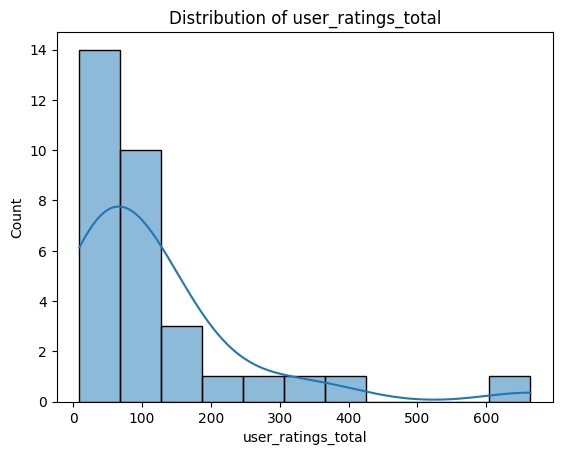

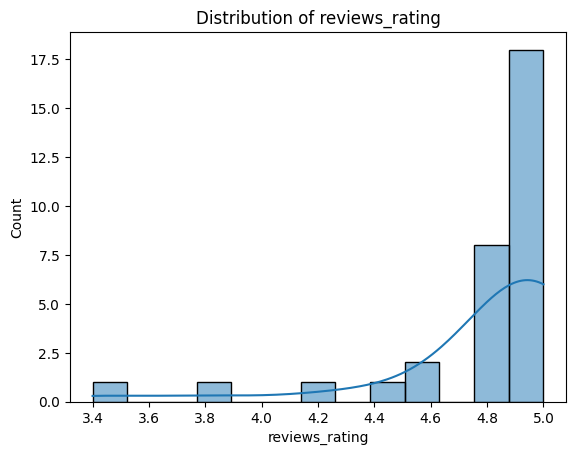

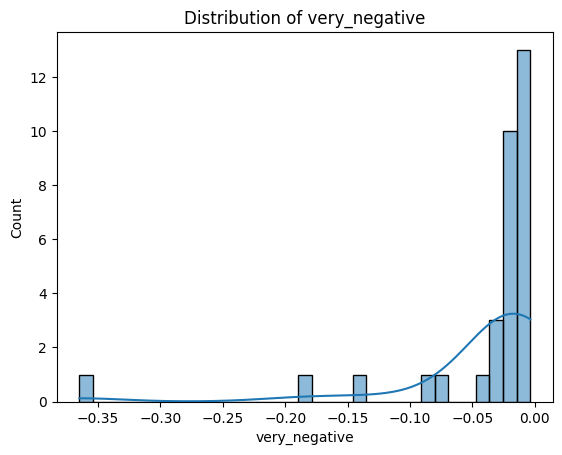

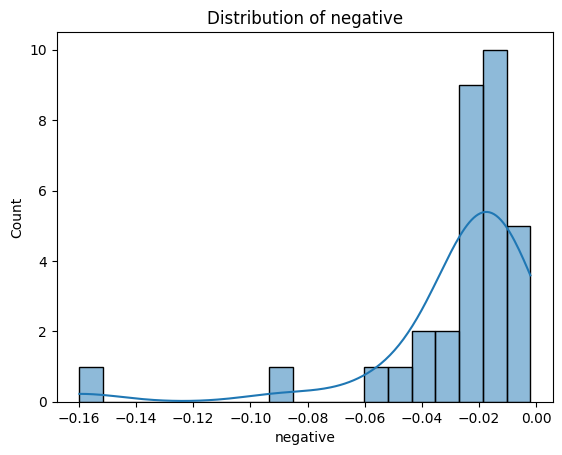

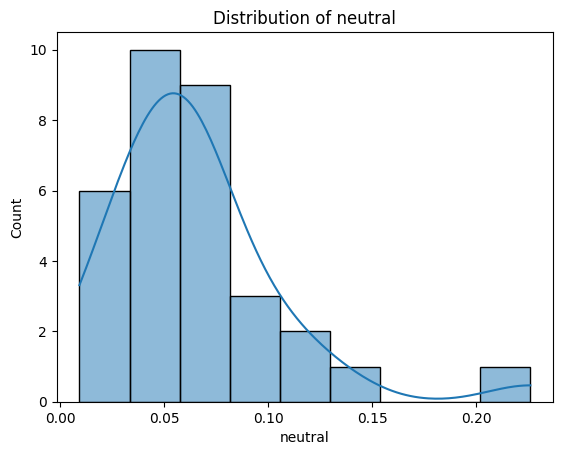

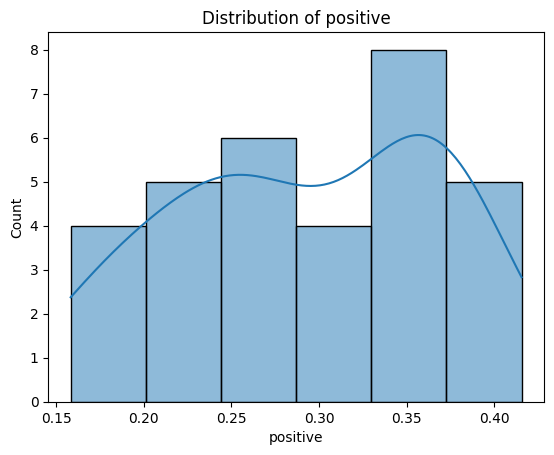

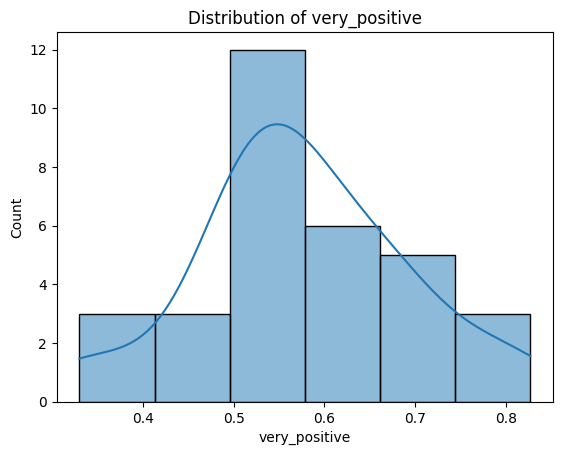

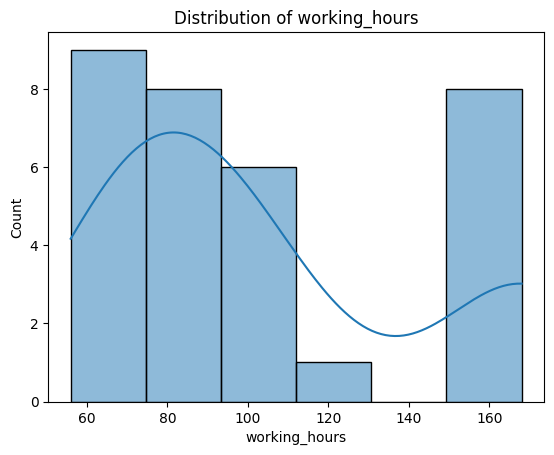

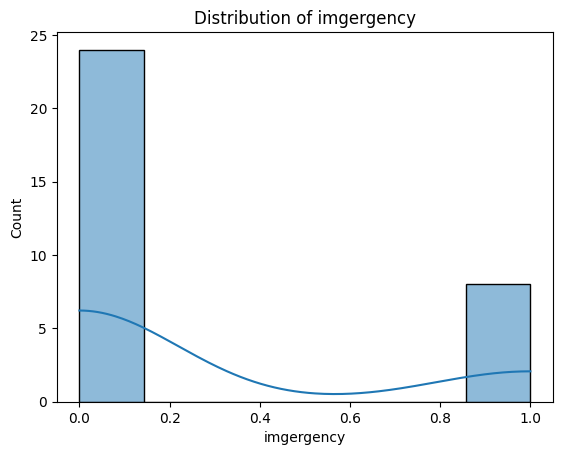

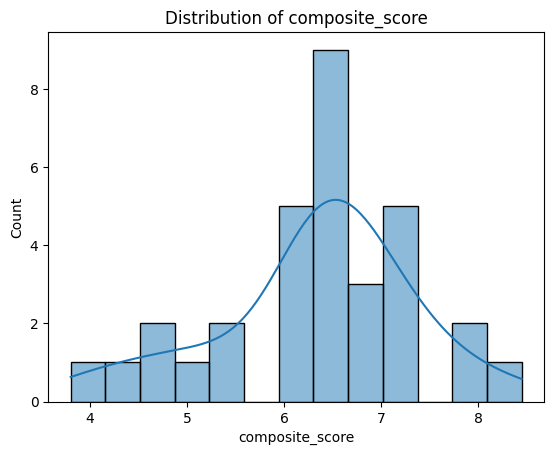

In [ ]:


plt.figure(figsize=(10, 6))

for i in eda_df.columns:
    plt.figure()
    sns.histplot(eda_df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)  # Set x-axis label
    plt.show()  # Show the plot




In [ ]:
#####feature scaling $######################


from sklearn.preprocessing import StandardScaler

In [ ]:
x_eda_df=eda_df.drop("composite_score",axis=1)
y_eda_df = eda_df["composite_score"]


In [ ]:
scaled_x_eda_df= StandardScaler().fit_transform(x_eda_df)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_eda_df,y_eda_df,random_state=42,test_size=0.2)

In [ ]:
regressor= LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred= regressor.predict(x_test)

In [ ]:
coeff= pd.Series(regressor.coef_,x_eda_df.columns)

In [ ]:
coeff

user_ratings_total    4.595446e-02
reviews_rating       -9.819541e-02
very_negative         6.192062e+13
negative              2.567258e+13
neutral              -3.576346e+13
positive             -6.499400e+13
very_positive        -1.000799e+14
working_hours         3.403273e-01
imgergency           -1.292297e-01
dtype: float64

In [ ]:
scaled_x_eda_df

array([[-0.71643399,  0.01709214,  0.457917  ,  0.23413601,  0.84232883,
         0.83614871, -0.50063853,  0.10433329, -0.57735027],
       [ 1.07167872,  0.56404076,  0.34044149,  0.20844415, -0.27548195,
         0.82780694, -0.17504661, -0.13840131, -0.57735027],
       [-0.21424063, -3.81154818, -4.60711542, -0.40631272, -1.00277901,
        -1.68013923, -1.50524432, -0.87938062, -0.57735027],
       [ 0.074901  ,  0.56404076, -0.43135445, -0.78210081, -0.29096569,
        -0.88806761,  0.21319689, -0.87938062, -0.57735027],
       [-0.82295985, -1.07680509, -1.43714425, -2.06962236,  1.27136113,
         0.4300839 , -2.15370433,  1.62461844,  1.73205081],
       [-0.62512611,  0.56404076,  0.31681049,  0.38656307, -0.51049367,
        -0.58764963,  0.85923225, -0.52166647, -0.57735027],
       [-0.68599803,  0.56404076,  0.52621341,  0.85229556, -1.35831798,
        -1.82312961,  2.21357819,  1.62461844,  1.73205081],
       [-0.56425418,  0.56404076,  0.34935305,  0.24090572,  0

In [ ]:
y_test

29    6.24
15    6.30
24    4.60
17    6.38
8     7.75
9     6.75
30    7.82
Name: composite_score, dtype: float64

In [ ]:
y_pred

array([5.90201164, 6.16763664, 4.96841789, 6.28482414, 7.89419914,
       6.23013664, 7.95669914])

In [ ]:
from sklearn.metrics import root_mean_squared_error , r2_score

rmse= root_mean_squared_error(y_test,y_pred)

In [ ]:
rmse

0.2894043984255595

In [ ]:
r_2_value = r2_score(y_test,y_pred)

In [ ]:
r_2_value

0.9172252151952809

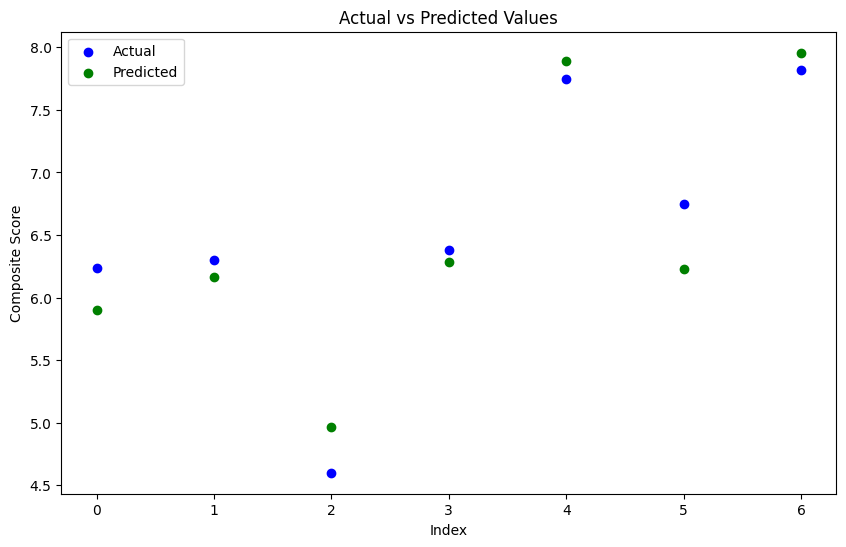

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_test, label='Actual', color='blue')


plt.scatter(x_axis, y_pred, label='Predicted', color='green')

plt.xlabel('Index')
plt.ylabel('Composite Score')
plt.title('Actual vs Predicted Values')

plt.legend()


plt.show()


In [ ]:
####### elasticnet  #############3


from sklearn.linear_model import ElasticNet

In [ ]:
#elastic_net= ElasticNet(alpha=0.1,l1_ratio=0.5)
#elastic_net= ElasticNet(alpha=0.5,l1_ratio=0.5)
elastic_net= ElasticNet(alpha=0.1,l1_ratio=0.5)

In [ ]:
elastic_net.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred = elastic_net.predict(x_test)

In [ ]:
y_pred

array([6.22170878, 6.30451041, 5.27577746, 6.27742915, 7.70828279,
       6.58756514, 7.6776074 ])

In [ ]:
y_test

29    6.24
15    6.30
24    4.60
17    6.38
8     7.75
9     6.75
30    7.82
Name: composite_score, dtype: float64

In [ ]:
rmse= root_mean_squared_error(y_test,y_pred)

In [ ]:
rmse

0.2500290972827495

In [ ]:
pd.Series(elastic_net.coef_,x_eda_df.columns)

user_ratings_total    0.020348
reviews_rating        0.057189
very_negative         0.319417
negative              0.087269
neutral              -0.061357
positive             -0.134787
very_positive         0.548863
working_hours         0.063090
imgergency            0.029320
dtype: float64

In [ ]:
r2_score_elastic_net = r2_score(y_test,y_pred)

In [ ]:
r2_score_elastic_net

0.9382170115305444

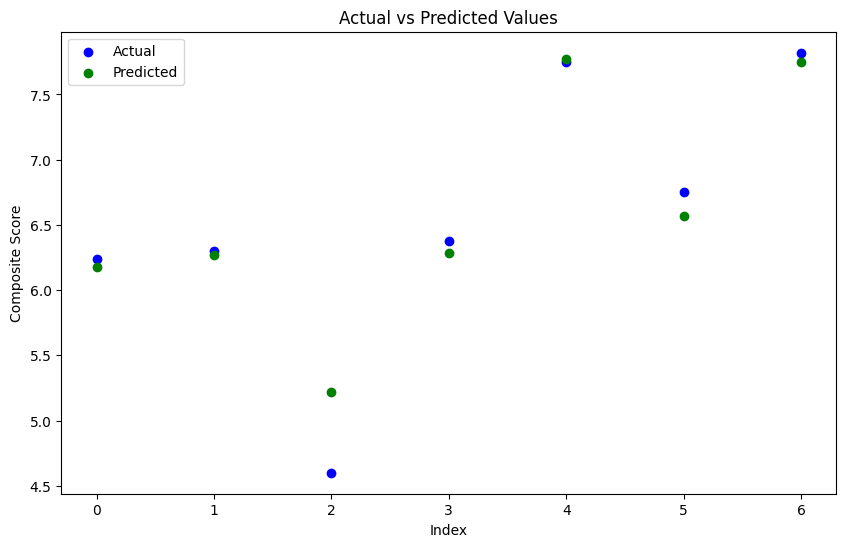

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_test, label='Actual', color='blue')

# Plot predicted values
plt.scatter(x_axis, y_pred, label='Predicted', color='green')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Composite Score')
plt.title('Actual vs Predicted Values')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
elastic_net.coef_

array([ 0.        ,  0.01851418,  0.22569859,  0.02896663, -0.        ,
       -0.        ,  0.73922446,  0.04351753,  0.0261459 ])

In [ ]:
######## using decision regr ####

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_regression = DecisionTreeRegressor(max_depth=3)

In [ ]:
tree_regression.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_pred= tree_regression.predict(x_test)

In [ ]:
y_pred

array([6.32375, 6.32375, 4.75   , 6.644  , 7.144  , 6.644  , 7.144  ])

In [ ]:
rmse= root_mean_squared_error(y_test,y_pred)

In [ ]:
rmse

0.36551766128914404

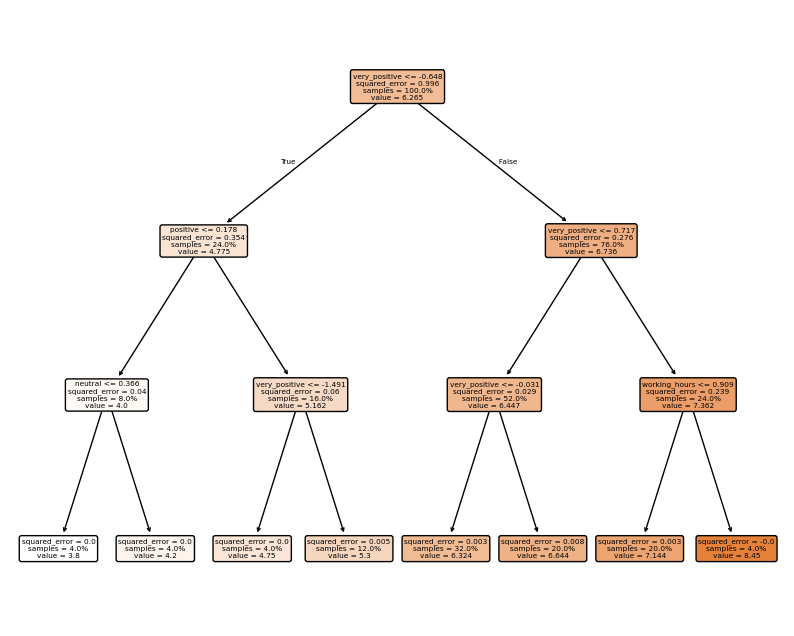

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 8))
plot_tree(tree_regression,
          feature_names=x_eda_df.columns,
          class_names=["composite_score"],
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples


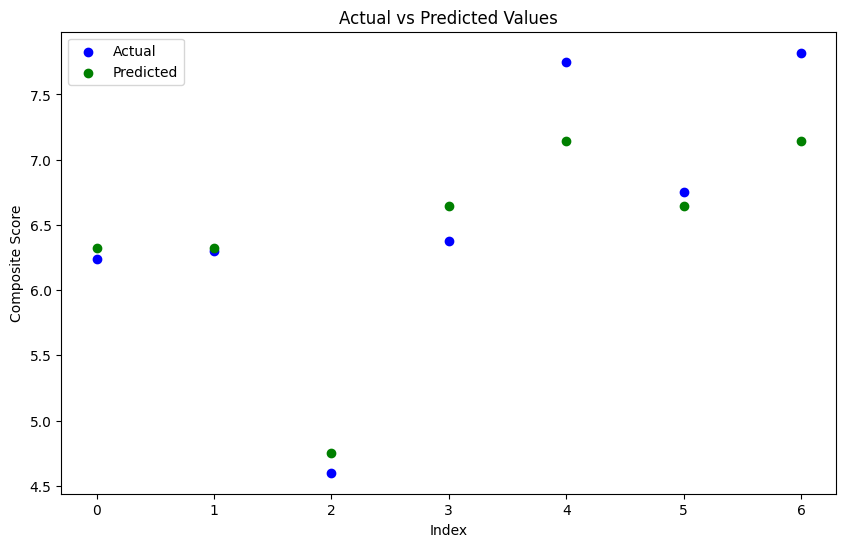

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_test, label='Actual', color='blue')

# Plot predicted values
plt.scatter(x_axis, y_pred, label='Predicted', color='green')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Composite Score')
plt.title('Actual vs Predicted Values')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators=100,         # Number of trees
    max_features='sqrt',      # Feature sampling: √p (random subset of features)
    bootstrap=True,           # Row sampling (bootstrap sampling)
    random_state=12 )
forest.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=12)

In [ ]:
forest.predict(x_test)

array([6.306 , 6.2774, 4.8962, 6.1518, 7.3861, 6.583 , 7.3232])

In [ ]:
y_test

29    6.24
15    6.30
24    4.60
17    6.38
8     7.75
9     6.75
30    7.82
Name: composite_score, dtype: float64

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
reggressor = BaggingRegressor(estimator=elastic_net,n_estimators=10,bootstrap= True,random_state=12)

In [ ]:
reggressor.fit(x_train,y_train)

BaggingRegressor(estimator=ElasticNet(alpha=0.1), random_state=12)

In [ ]:
reggressor.predict(x_test)

array([6.20824417, 6.28723398, 5.46871749, 6.29385751, 7.70827678,
       6.59599652, 7.67814679])

In [ ]:
######################################distance calculator between lat lon #############################


!pip install geopy

In [ ]:
current_location=(12.971389, 77.750130)

path="final_pet_boarding.csv"
df = pd.read_csv(path)

In [ ]:
import json
import geopy
import geopy.distance
t=[]
for i in df["geometry"]:
    match = re.findall(r'\d+\.\d+|\d+', i)
    co_ordinates=tuple(match)
    dist=geopy.distance.geodesic(current_location,co_ordinates).km
    print(round(dist,ndigits=2))



6.15
4.72
4.93
2.63
6.22
3.72
5.92
7.77
11.41
9.91
9.23
7.2
4.84
0.89
3.13
5.68
7.82
8.36
9.87
10.05
0.8
4.24
2.7
3.72
9.26
4.11
2.67
6.83
5.21
4.92
8.25
8.94


In [ ]:
##################################creating graph #####################################3

!pip install networkx

In [ ]:
final_df.columns

Index(['name', 'business_status', 'formatted_address',
       'formatted_phone_number', 'international_phone_number', 'place_id',
       'plus_code', 'rating', 'reference', 'service_type', 'url',
       'user_ratings_total', 'wheelchair_accessible_entrance', 'website',
       'geometry', 'current_opening_hours', 'reviews_text', 'reviews_rating',
       'very_negative', 'negative', 'neutral', 'positive', 'very_positive',
       'summerized_review', 'Important_keys', 'working_hours', 'imgergency',
       'composite_score'],
      dtype='object')

In [ ]:
final_df.head(1)

,name,business_status,formatted_address,formatted_phone_number,international_phone_number,place_id,plus_code,rating,reference,service_type,...,very_negative,negative,neutral,positive,very_positive,summerized_review,Important_keys,working_hours,imgergency,composite_score
0,LuLu home dog boarding service,OPERATIONAL,"5th Main Rd, Chowdeshwari Layout, Marathahalli...",089034 64530,+91 89034 64530,ChIJ37EEeZoTrjsRINe5A5z9A9o,"{'compound_code': 'XM3W+RF Bengaluru, Karnatak...",5.0,ChIJ37EEeZoTrjsRINe5A5z9A9o,"['point_of_interest', 'establishment']",...,0.008266,0.020104,0.09875,0.354874,0.518006,"""It's really nyc to board my luna in an homely...","'dog care', 'environment dog care', 'homely en...",108.5,0.0,6.25


In [ ]:
import networkx as nx

In [ ]:
for i ,j in final_df.iterrows():
    print(j["name"])



LuLu home dog boarding service
Vicky Dog Home Stay
Mac's Pet Vacation Home and Play Area
Blackys BnB
Signature Puppies
SNIFFINGTAIL
Caring Nest Pet Boarding Service
DogMama
Pawfect Homie
THE REDD ROTROLLEN KENNELS
Snouters - Pet Boarding Bangalore
Pawleys 5-star Pet Boarding
Dogs Way Home
MyPetz Pet Clinic Spa & Store
Petboro Pet Resort and Kennels
Paw palace | Luxury Pet Boarding
Surya Kennels
Petspace
Lia Pet Boarding and tamed birds
Pets 4 You
Karthik Aviary
Waggersland
Snouters - Pet Home Boarding Bangalore
Conductors kennel
Spar Pet Home
BUBBLY KENNELS
Paw Home Stay
Mutts & Nutts
Muffin’s Pet Boarding🐾🐶
Coco's Friend Hub
Preethi Pet Care
DogNation
